# Overview

inertia actually calculates the sum of distances of all the points within a cluster from the centroid of that cluster.

Normally, we use Euclidean distance as the distance metric, as long as most of the features are numeric; 
otherwise, Manhattan distance in case most of the features are categorical

In [3]:
# import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt


In [26]:
# Reading the data
data = pd.read_csv('clustering.csv')
data.head(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


Gonna take only the “LoanAmount” and “ApplicantIncome" vars


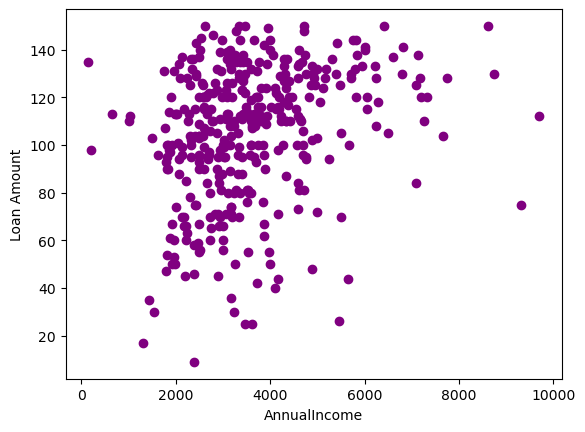

In [27]:
X = data[["LoanAmount","ApplicantIncome"]]

plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='purple')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount')
plt.show()

### Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster


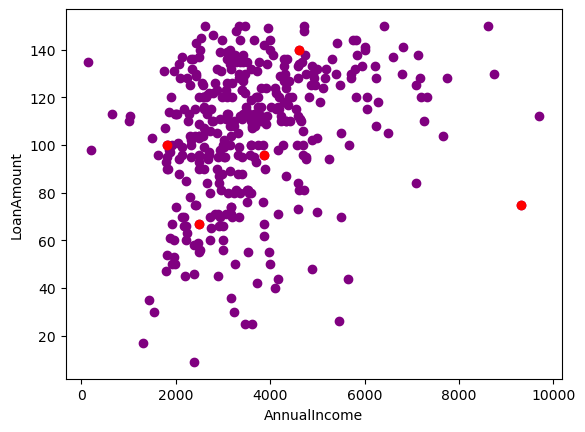

In [28]:
k = 5 # gonna choose 3 clusters

Centroids = (X.sample(n=k)) # returns specified number of random rows fro the dataframe 'X', in our case k random centroids 
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c= 'purple')
plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('LoanAmount')
plt.show()

### Step 3 - Assign all the points to the closest cluster centroid
### Step 4 - Recompute centroids of newly formed clusters
### Step 5 - Repeat step 3 and 4


In [29]:
print(Centroids)
X.head()

     LoanAmount  ApplicantIncome
291        96.0             3859
268       100.0             1820
99         75.0             9323
209        67.0             2500
340       140.0             4608


,LoanAmount,ApplicantIncome
0,128.0,4583
1,66.0,3000
2,120.0,2583
3,141.0,6000
4,95.0,2333


In [30]:
diff = 1
j=0
#ED represents the euclideen distance

while(diff!=0): #if the diff==0 that means that clusters changement is stable, so we stop theres 
    XD=X.copy() #i used this instead of assiginng df to df directly cuz that causes problems like settingwithcopywarning
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows(): # here we gonna calculate the distance between every centroid in row_c(Centroids) and the point tuples coming from row_d (Dataframe)
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    
    #in order to update the centroids we'll calculate the mean
    NewCentroid = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (NewCentroid['LoanAmount'] - Centroids['LoanAmount']).sum() + (NewCentroid['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

/tmp/ipykernel_11969/1585717420.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
/tmp/ipykernel_11969/1585717420.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
/tmp/ipykernel_11969/1585717420.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

-87.93235883034822
54.602643431589655


/tmp/ipykernel_11969/1585717420.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
/tmp/ipykernel_11969/1585717420.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
/tmp/ipykernel_11969/1585717420.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

61.49556572567906
77.92951019333145


/tmp/ipykernel_11969/1585717420.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
/tmp/ipykernel_11969/1585717420.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
/tmp/ipykernel_11969/1585717420.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

46.7980567794403


/tmp/ipykernel_11969/1585717420.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
/tmp/ipykernel_11969/1585717420.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


11.528070753038122
0.0


/tmp/ipykernel_11969/1585717420.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


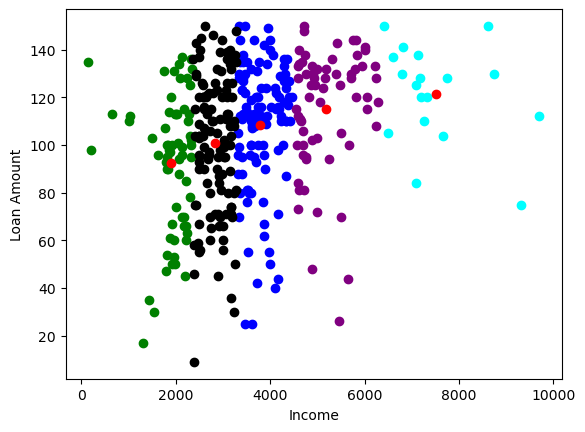

In [31]:
color=['blue','green','cyan', 'black', 'purple']
for k in range(k):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()  

Kmeans optimized approach by not initializing K
1. The first centroid is selected randomly.

2. Calculate the Euclidean distance between the centroid and every other data point in the dataset. The point farthest away will become our next centroid.

3. Create clusters around these centroids by associating every point with its nearest centroid.

4. The point which has the farthest distance from its centroid will be our next centroid.

5. Repeat steps 3 and 4 until n number of centroids are located.

In [32]:

def get_kmeans_pp_centroids(X1,k = 6):
    centroids = X1.sample()
    print(centroids)
    i = 1
    dist = []
    while i != k:
        max_dist = [0,0]
        #go through the centroids
        for index, row in centroids.iterrows():
            #calculate distance of every centroid with every other data point 
            d = np.sqrt((X1["ApplicantIncome"] - row["ApplicantIncome"])**2 +(X1["LoanAmount"] - row["LoanAmount"])**2)
            #check which centroid has a max distance with another point
            if max(d) > max(max_dist):
                max_dist = d

        X1 = pd.concat([X1, max_dist], axis = 1)
        idx = X1.iloc[:,i+1].idxmax()
        max_coor = pd.DataFrame(X1.iloc[idx][["ApplicantIncome", "LoanAmount"]]).T
        centroids = pd.concat([centroids,max_coor])
        X1 = X1.drop(idx)
        i+=1
    return centroids

In [33]:
centroids = get_kmeans_pp_centroids(X, k=4)


    LoanAmount  ApplicantIncome            1           2            3  \
83        70.0             2718  1076.209227  822.194285  4793.165567   

             4            5  Cluster  
83  121.595761  2466.785202        4  


In [34]:
diff = 1
j=0
#ED represents the euclideen distance

while(diff!=0): #if the diff==0 that means that clusters changement is stable, so we stop theres 
    XD=X.copy() #i used this instead of assiginng df to df directly cuz that causes problems like settingwithcopywarning
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows(): # here we gonna calculate the distance between every centroid in row_c(Centroids) and the point tuples coming from row_d (Dataframe)
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    
    #in order to update the centroids we'll calculate the mean
    NewCentroid = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (NewCentroid['LoanAmount'] - Centroids['LoanAmount']).sum() + (NewCentroid['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

32.53221744376394
123.17987355224632
130.77231190870845
217.80250808578955
131.9201429631048
275.92923033070815
82.87200788309819
105.0985907546691
62.76285987971974
59.42850752383134
86.4759967061905
66.46585256786895
105.89524042040519
85.93895154883096
0.0


In [35]:
print(k)

4


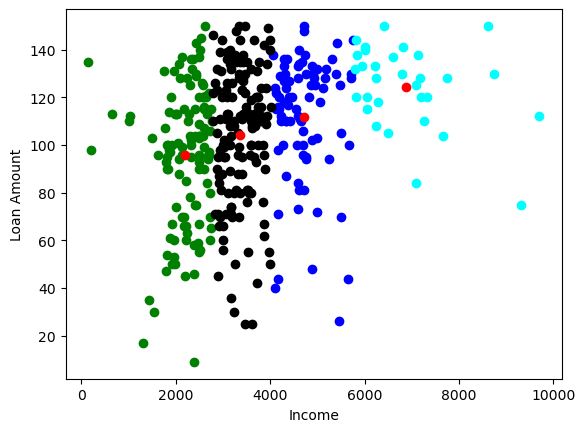

In [36]:
color=['blue','green','cyan', 'black', 'purple']
for k in range(k):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()  